In [332]:
import time
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, plot_confusion_matrix
from sklearn.model_selection import train_test_split , GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

## __READ DATA__

In [357]:
train_data = pd.read_csv("trainData.csv")
test_data = pd.read_csv("testData.csv")
example_result = pd.read_csv("ornekSonuc.csv")

In [358]:
train_data.head()

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,target
0,1.4,0.0,0.2,1.0,4.2,0.4,0.0,0.0,0.0,1.2,...,0.6,0.2,0.0,3.2,1.0,0.2,0.0,1.6,0.4,9
1,0.0,0.0,0.0,2.8,0.0,0.8,0.0,0.2,1.2,1.4,...,0.0,0.0,1.2,0.0,1.2,0.2,0.2,2.6,2.2,6
2,0.0,0.0,0.0,0.4,0.0,0.6,0.8,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.8,0.2,0.8,1.4,0.0,3
3,0.0,0.0,0.0,0.0,0.2,0.8,0.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4,0.4,0.0,0.4,0.4,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.4,0.0,3


In [359]:
test_data.head()

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99
0,0.0,0.0,0.0,0.0,0.2,0.2,0.6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.6,5.0,0.0
1,0.0,0.0,0.0,5.2,0.0,0.0,0.0,0.0,1.6,0.8,...,0.0,0.0,0.8,0.0,0.0,3.6,0.4,0.0,2.4,0.0
2,0.0,0.0,0.8,2.2,0.0,0.4,0.0,0.0,0.2,0.0,...,0.0,0.0,0.4,0.0,0.2,1.6,0.6,0.0,0.6,1.6
3,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,0.0,0.6,0.2,0.0,0.0,0.4,0.0,0.0,0.0,0.8,...,0.0,0.0,0.6,0.0,0.0,0.2,0.2,0.6,0.8,0.0


In [360]:
example_result.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [361]:
example_result

,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
144363,1,0,0,0,0,0,0,0,0
144364,1,0,0,0,0,0,0,0,0
144365,1,0,0,0,0,0,0,0,0
144366,1,0,0,0,0,0,0,0,0


## __GET X(WITHOUT TARGET) AND Y(ONLY TARGET) FROM TRAIN DATA__

In [362]:
X = train_data.drop(columns=["target"])
y = train_data[["target"]]

target_labels = train_data["target"].unique()
target_labels = sorted(target_labels)

In [363]:
target_labels

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [364]:
X

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99
0,1.4,0.0,0.2,1.0,4.2,0.4,0.0,0.0,0.0,1.2,...,0.2,0.6,0.2,0.0,3.2,1.0,0.2,0.0,1.6,0.4
1,0.0,0.0,0.0,2.8,0.0,0.8,0.0,0.2,1.2,1.4,...,0.0,0.0,0.0,1.2,0.0,1.2,0.2,0.2,2.6,2.2
2,0.0,0.0,0.0,0.4,0.0,0.6,0.8,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.8,0.2,0.8,1.4,0.0
3,0.0,0.0,0.0,0.0,0.2,0.8,0.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.4,0.4,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,0.0,0.0,0.0,0.0,0.0,1.2,1.8,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,1.8,0.8,0.0
61874,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.0,1.0,...,0.0,0.0,0.4,0.0,0.6,0.2,0.0,0.0,1.0,1.4
61875,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.6,0.0,0.2,0.0,0.0,0.2,0.0,0.0
61876,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.4,...,0.2,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.4,0.0


In [365]:
y

,target
0,9
1,6
2,3
3,4
4,3
...,...
61873,4
61874,6
61875,8
61876,5


## __Random Forest Classifier__

In [377]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, random_state = 0)

In [373]:
parameters = { 
    'n_estimators': [200, 500, 700, 900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

kfold = KFold(n_splits=3, random_state=42, shuffle=True)
rf_clf = RandomForestClassifier()
gridsearch_rf = GridSearchCV(estimator=rf_clf, param_grid=parameters, n_jobs=-1, cv=kfold, scoring="neg_log_loss")
gridsearch_rf.fit(X_train_rf, y_train_rf)

/opt/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_scor

In [374]:
gridsearch_rf.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 900}

In [380]:
rf_clf = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 700, criterion='gini')
rf_clf.fit(X_train_rf, y_train_rf)
y_pred_rf = clf1.predict(X_test_rf)
rf_probs = clf1.predict_proba(X_test_rf)
print("Accuracy:",metrics.accuracy_score(y_test_rf, y_pred_rf))
score = log_loss(y_test_rf, rf_probs)
print("Logloss: ", score)

/opt/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.8078215901745314
Logloss:  0.5747831417321704


In [382]:
rf_comparison_df = pd.DataFrame()
rf_comparison_df['true_labels'] = y_test_rf['target'].tolist()
rf_comparison_df['predicted_labels'] = y_pred_rf
rf_comparison_df

,true_labels,predicted_labels
0,7,3
1,2,2
2,2,2
3,9,9
4,5,5
...,...,...
15465,3,3
15466,2,2
15467,2,2
15468,8,8


In [387]:
rf_submission_df = pd.DataFrame(columns=[["1", "2", "3", "4", "5", "6", "7", "8", "9"]], data=rf_probs)
rf_submission_df

,1,2,3,4,5,6,7,8,9
0,0.002857,0.404286,0.418571,0.112857,0.001429,0.005714,0.048571,0.001429,0.004286
1,0.000000,0.777143,0.184286,0.028571,0.000000,0.000000,0.001429,0.007143,0.001429
2,0.004286,0.860000,0.067143,0.044286,0.001429,0.007143,0.014286,0.001429,0.000000
3,0.084286,0.004286,0.000000,0.000000,0.005714,0.010000,0.004286,0.010000,0.881429
4,0.005714,0.075714,0.015714,0.005714,0.884286,0.007143,0.002857,0.001429,0.001429
...,...,...,...,...,...,...,...,...,...
15465,0.051429,0.311429,0.388571,0.004286,0.002857,0.027143,0.027143,0.141429,0.045714
15466,0.008571,0.808571,0.120000,0.025714,0.008571,0.005714,0.001429,0.011429,0.010000
15467,0.001429,0.721429,0.242857,0.028571,0.000000,0.000000,0.005714,0.000000,0.000000
15468,0.000000,0.002857,0.001429,0.000000,0.002857,0.037143,0.008571,0.944286,0.002857


## __XGBoost Classifier__

In [396]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, random_state = 0)

In [157]:
parameters = {"colsample_bytree":[0.3,0.4, 0.45, 0.6, 0.8, 1.0], 
              "learning_rate":[0.1, 0.2, 0.3],
              "n_estimators":[300, 500, 700, 800, 900],
              "gamma":[0.0001, 0.001, 0.01],
              'min_child_weight': [1, 5, 10],
              'subsample': [0.6, 0.8, 1.0]
             }

xgb_clf_gs = xgb.XGBClassifier(objective="multi:softmax", eval_metric="logloss")

folds = 3
param_comb = 6
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb_clf_gs, param_distributions=parameters, n_iter=param_comb, scoring='neg_log_loss', n_jobs=-1, cv=skf.split(X_train, y_train), verbose=3, random_state=1001)

start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

print("Time: ", end_time - start_time())

# xgb_clf_gs = xgb.XGBClassifier(eval_metric="logloss", n_estimators=700, learning_rate=0.1, gamma=0.001, max_depth=6, n_jobs=-1, booster='gbtree')
# gridsearch_xgb = GridSearchCV(estimator=clf, param_grid=parameters, n_jobs=-1, cv=kfold, scoring="neg_log_loss")

In [117]:
random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 300,
 'min_child_weight': 5,
 'learning_rate': 0.1,
 'gamma': 0.01,
 'colsample_bytree': 0.3}

In [404]:
# xgb_clf = xgb.XGBClassifier(objective="multi:softmax", eval_metric="mlogloss", n_estimators=700, learning_rate=0.1, gamma=0.01, max_depth=6, n_jobs=-1, booster='gbtree', colsample_bytree=0.3, min_child_weight=5, subsample=0.8)
xgb_clf = xgb.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=None, colsample_bytree=0.6, gamma=0, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.03, max_delta_step=0, max_depth=28,
              min_child_weight=6, monotone_constraints=None,
              n_estimators=700, n_jobs=None, nthread=-1, num_parallel_tree=None,
              objective='multi:softmax', random_state=None, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
              subsample=0.8, tree_method=None, validate_parameters=None,
              verbosity=None)

xgb_clf.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = xgb_clf.predict(X_test_xgb)
xgb_probs = xgb_clf.predict_proba(X_test_xgb)
print("Accuracy:",metrics.accuracy_score(y_test_xgb, y_pred_xgb))
score = log_loss(y_test_xgb, xgb_probs)
print("Logloss: ", score)

/opt/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22:26:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { scale_pos_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy: 0.8263089851325145
Logloss:  0.4597055968460563


In [415]:
xgb_prob = pd.DataFrame(data=xgb_probs, columns=["1", "2", "3", "4", "5", "6", "7", "8", "9"])
xgb_prob.to_csv("trial/second_trial/xgb_second_predictions_probabilities.csv")
xgb_prob

,1,2,3,4,5,6,7,8,9
0,0.000207,0.483535,0.461407,0.008990,0.000065,0.000521,0.045020,0.000141,0.000115
1,0.000094,0.942939,0.053242,0.003091,0.000048,0.000093,0.000232,0.000182,0.000080
2,0.000012,0.996814,0.001772,0.001270,0.000016,0.000023,0.000060,0.000011,0.000021
3,0.051208,0.000097,0.000060,0.000040,0.000130,0.000481,0.000133,0.000304,0.947546
4,0.000532,0.006088,0.001074,0.006163,0.984778,0.000054,0.001068,0.000134,0.000108
...,...,...,...,...,...,...,...,...,...
15465,0.000654,0.127151,0.859089,0.000183,0.000717,0.000837,0.000470,0.010392,0.000508
15466,0.000056,0.992112,0.003775,0.000456,0.003072,0.000103,0.000062,0.000284,0.000081
15467,0.000148,0.870988,0.117525,0.010680,0.000065,0.000075,0.000275,0.000130,0.000114
15468,0.001239,0.000090,0.000229,0.000840,0.000045,0.041510,0.000783,0.950345,0.004920


In [411]:
xgb_pred_classes = pd.DataFrame(data=y_pred_xgb)
xgb_pred_classes

,0
0,2
1,2
2,2
3,9
4,5
...,...
15465,3
15466,2
15467,2
15468,8


## __KERAS MULTICLASS CLASSIFICATION__

In [269]:
import datetime, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

%load_ext tensorboard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

early_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [285]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized)

In [258]:
y_dummies = pd.get_dummies(y)

In [286]:
X_normalized_df

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,0.072165,0.000000,0.011765,0.065789,0.313433,0.026316,0.000000,0.000000,0.000000,0.022814,...,0.032258,0.136364,0.020408,0.000,0.16,0.060241,0.013158,0.000000,0.030075,0.021978
1,0.000000,0.000000,0.000000,0.184211,0.000000,0.052632,0.000000,0.016129,0.057143,0.026616,...,0.000000,0.000000,0.000000,0.125,0.00,0.072289,0.013158,0.011494,0.048872,0.120879
2,0.000000,0.000000,0.000000,0.026316,0.000000,0.039474,0.121212,0.000000,0.000000,0.003802,...,0.000000,0.000000,0.000000,0.000,0.00,0.048193,0.013158,0.045977,0.026316,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.014925,0.052632,0.060606,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.02,0.024096,0.000000,0.022989,0.007519,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003802,...,0.000000,0.000000,0.020408,0.000,0.00,0.000000,0.000000,0.000000,0.007519,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,0.000000,0.000000,0.000000,0.000000,0.000000,0.078947,0.272727,0.000000,0.000000,0.003802,...,0.000000,0.000000,0.000000,0.000,0.00,0.012048,0.000000,0.103448,0.015038,0.000000
61874,0.000000,0.000000,0.011765,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.019011,...,0.000000,0.000000,0.040816,0.000,0.03,0.012048,0.000000,0.000000,0.018797,0.076923
61875,0.000000,0.011494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.061224,0.000,0.01,0.000000,0.000000,0.011494,0.000000,0.000000
61876,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.007605,...,0.032258,0.000000,0.040816,0.000,0.00,0.000000,0.000000,0.000000,0.007519,0.000000


In [260]:
y_dummies

,target
0,9
1,6
2,3
3,4
4,3
...,...
61873,4
61874,6
61875,8
61876,5


In [277]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size = 0.2, random_state = 42)

In [278]:
# For Keras, convert dataframe to array values (Inbuilt requirement of Keras)
X_train_array = X_train.values
y__train_array = y_train.values
X_test_array = X_test.values
y_test_array = y_test.values

in_dim = X_train_array.shape[1]
out_dim = y__train_array.shape[1]

In [316]:
# Baseline Model
def baseline_model():
    # Create model here
    model = Sequential()
    model.add(Dense(128, input_dim = in_dim, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(256, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(10, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
#     model.add(Dense(out_dim))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [317]:
# Create Keras Classifier and use predefined baseline model
estimator = KerasClassifier(build_fn = baseline_model, epochs = 100, batch_size = 10)

In [318]:
# KFold Cross Validation
kfold = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [319]:
estimator.fit(X_train, y_train, epochs=100, batch_size=30, validation_data=(X_test, y_test))

Train on 49502 samples, validate on 12376 samples
Epoch 1/100
49502/49502 [==============================] - 3s 55us/step - loss: 0.7991 - accuracy: 0.7106 - val_loss: 5.3141 - val_accuracy: 0.0554
Epoch 2/100
49502/49502 [==============================] - 2s 50us/step - loss: 0.6134 - accuracy: 0.7638 - val_loss: 6.0422 - val_accuracy: 0.0520
Epoch 3/100
49502/49502 [==============================] - 2s 50us/step - loss: 0.5720 - accuracy: 0.7750 - val_loss: 6.2049 - val_accuracy: 0.0326
Epoch 4/100
49502/49502 [==============================] - 2s 50us/step - loss: 0.5454 - accuracy: 0.7860 - val_loss: 7.0680 - val_accuracy: 0.0726
Epoch 5/100
49502/49502 [==============================] - 2s 50us/step - loss: 0.5249 - accuracy: 0.7924 - val_loss: 7.5831 - val_accuracy: 0.0525
Epoch 6/100
49502/49502 [==============================] - 2s 50us/step - loss: 0.5096 - accuracy: 0.7974 - val_loss: 8.3474 - val_accuracy: 0.0755
Epoch 7/100
49502/49502 [==============================] - 2s 

In [324]:
predictions = estimator.predict(X_test_array)
matrix = confusion_matrix(y_test_array, predictions)

In [330]:
predictions

array([4, 9, 2, ..., 6, 4, 2])

In [327]:
matrix

array([[ 212,    7,    1,    2,    0,   25,   23,   40,   66],
       [   2, 2572,  457,   99,    7,    7,   37,    7,   12],
       [   1,  703,  744,   63,    0,    9,   36,    5,    2],
       [   1,  162,   71,  273,    5,    3,   14,    1,    2],
       [   3,   15,    1,    3,  553,    0,    0,    0,    0],
       [  37,   20,    8,   15,    3, 2615,   56,   41,   49],
       [  15,   53,   44,   13,    4,   42,  374,   19,    6],
       [  51,   18,    5,    2,    4,   70,   19, 1533,   45],
       [  40,   15,    1,    0,    3,   27,    7,   27,  849]])

Confusion matrix, without normalization
[[ 212    7    1    2    0   25   23   40   66]
 [   2 2572  457   99    7    7   37    7   12]
 [   1  703  744   63    0    9   36    5    2]
 [   1  162   71  273    5    3   14    1    2]
 [   3   15    1    3  553    0    0    0    0]
 [  37   20    8   15    3 2615   56   41   49]
 [  15   53   44   13    4   42  374   19    6]
 [  51   18    5    2    4   70   19 1533   45]
 [  40   15    1    0    3   27    7   27  849]]


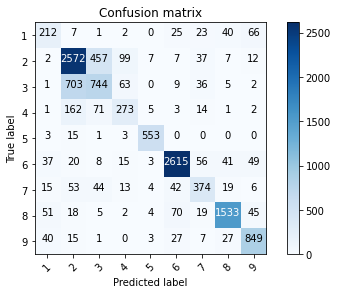

In [335]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_true=y_test_array, y_pred=predictions)
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, target_labels)

In [339]:
from collections import Counter

Counter(y_test['target'].tolist())

Counter({4: 532,
         9: 969,
         2: 3200,
         6: 2844,
         8: 1747,
         5: 575,
         7: 570,
         1: 376,
         3: 1563})

In [356]:
comparison_df_keras = pd.DataFrame()
comparison_df_keras['true_labels'] = y_test['target'].tolist()
comparison_df_keras['predicted_labels'] = predictions
comparison_df_keras

ValueError: Length of values does not match length of index